Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training...

EPOCH 1 ...
Training Accuracy = 0.829
Validation Accuracy = 0.799
Training Loss = 0.591
Validation Loss = 0.690
Processing time = 29.40 seconds

EPOCH 2 ...
Training Accuracy = 0.919
Validation Accuracy = 0.881
Training Loss = 0.298
Validation Loss = 0.420
Processing time = 28.27 seconds

EPOCH 3 ...
Training Accuracy = 0.948
Validation Accuracy = 0.898
Training Loss = 0.193
Validation Loss = 0.352
Processing time = 26.65 seconds

EPOCH 4 ...
Training Accuracy = 0.963
Validation Accuracy = 0.905
Training Loss = 0.136
Validation Loss = 0.323
Processing time = 28.56 seconds

EPOCH 5 ...
Training Accuracy = 0.965
Validation Accuracy = 0.915
Training Loss = 0.120
Validation Loss = 0.320
Processing time = 27.99 seconds

EPOCH 6 ..

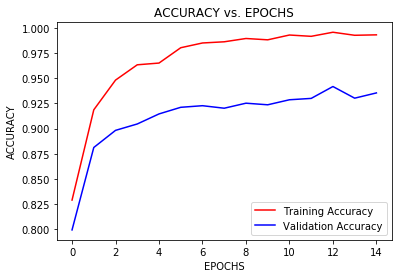

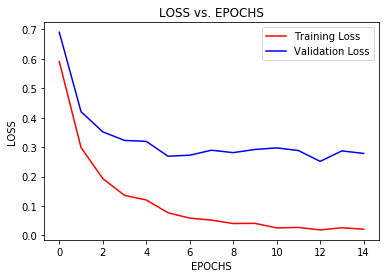

In [15]:
# Load pickled data
import pickle
import os
import csv

# TODO: Fill this in based on where you saved the training and testing data

#fileDir = os.path.dirname(os.path.realpath('__file__'))
#training_file = os.path.join(fileDir, 'traffic-signs-data/train.p')
#validation_file = os.path.join(fileDir, 'traffic-signs-data/valid.p')
#testing_file = os.path.join(fileDir, 'traffic-signs-data/test.p')

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

with open('signnames.csv', mode='r') as f:
    fread = csv.reader(f)
    next(fread, f)
    sign_labels = [rows[1] for rows in fread]

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

%matplotlib inline
import random
import numpy as np
%matplotlib inline

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from IPython.display import Image
from IPython.display import display
import cv2
import tensorflow as tf
import time

EPOCHS = 15
BATCH_SIZE = 128

#Some useful functions
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Save a copy of the original images
X_train_gold = X_train
X_test_gold = X_test
X_valid_gold = X_valid


#Convert images to grayscale
X_train_gray = np.array([grayscale(img) for img in X_train])
X_test_gray = np.array([grayscale(img) for img in X_test])
X_valid_gray = np.array([grayscale(img) for img in X_valid])
    
# Equalize histogram of the image so contrast is better in the image
#clahe=cv2.createCLAHE() # Images do not look good with the clahe approach using default args
#X_train_eq_hst = np.array([clahe.apply(img) for img in X_train_gray])
#X_test_eq_hst = np.array([clahe.apply(img) for img in X_test_gray])
X_train_eq_hst = np.array([cv2.equalizeHist(img) for img in X_train_gray])
X_test_eq_hst = np.array([cv2.equalizeHist(img) for img in X_test_gray])
X_valid_eq_hst = np.array([cv2.equalizeHist(img) for img in X_valid_gray])

# Normalise input (images still in colour)
X_train_norm = (X_train_eq_hst - X_train_eq_hst.mean()) / (np.max(X_train_eq_hst) - np.min(X_train_eq_hst))
X_test_norm = (X_test_eq_hst - X_test_eq_hst.mean()) / (np.max(X_test_eq_hst) - np.min(X_test_eq_hst))
X_valid_norm = (X_valid_eq_hst - X_valid_eq_hst.mean()) / (np.max(X_valid_eq_hst) - np.min(X_valid_eq_hst))


# Reshape images to feed to the CNN. All of the below approaches work to add an empty dimension at the end of the array
#X_train_rshp = X_train_norm.reshape((-1, 32, 32, 1))
#X_test_rshp = X_train_norm.reshape((-1, 32, 32, 1))
#X_train_rshp = X_train_norm[...,np.newaxis]
#X_test_rshp = X_test_norm[...,np.newaxis]
X_train_rshp = X_train_norm[...,None]
X_test_rshp = X_test_norm[...,None]
X_valid_rshp = X_valid_norm[...,None]
#plt.subplot(1,5,5)
#plt.imshow(X_train_rshp[20], cmap="gray")

# Assign reshaped data back to original variables for ease of use
X_train = X_train_rshp
X_test = X_test_rshp
X_valid = X_valid_rshp

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#`x` is a placeholder for a batch of input images.
#`y` is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples

#Train the model
#Run the training data through the training pipeline to train the model.
#Before each epoch, shuffle the training set.
#After each epoch, measure the loss and accuracy of the validation set.
#Save the model after training.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    pts_train_acc = []
    pts_train_loss = []
    pts_valid_acc = []
    pts_valid_loss = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        begin =  time.time()
        X_train, y_train = shuffle(X_train, y_train)
        X_valid, y_valid = shuffle(X_valid, y_valid)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        pts_train_acc.append(training_accuracy)
        training_loss = evaluate_loss(X_train, y_train)
        pts_train_loss.append(training_loss)

        validation_accuracy = evaluate(X_valid, y_valid)
        pts_valid_acc.append(validation_accuracy)
        validation_loss = evaluate_loss(X_valid, y_valid)
        pts_valid_loss.append(validation_loss)
            
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Loss = {:.3f}".format(training_loss))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Processing time = {:.2f} seconds".format(time.time() - begin))
        print()
        
    saver.save(sess, './TrafficSignClassifer')
    print("Model saved")

#train_acc_plt,=plt.plot(range(EPOCHS), pts_train_loss, 'r', label='Training Accuracy')
#valid_acc_plt,=plt.plot(range(EPOCHS), pts_valid_loss, 'b', label='Validation Accuracy')
plt.plot(range(EPOCHS), pts_train_acc, 'r', label='Training Accuracy')
plt.plot(range(EPOCHS), pts_valid_acc, 'b', label='Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.title('ACCURACY vs. EPOCHS')
#plt.legend([train_acc_plt, valid_acc_plt], loc='best')
plt.legend(loc='best')
plt.show()

#train_loss_plt,=plt.plot(EPOCHS, pts_train_loss, 'r', label='Training Loss')
#valid_loss_plt,=plt.plot(EPOCHS, pts_valid_loss, 'b', label='Validation Loss')
plt.plot(range(EPOCHS), pts_train_loss, 'r', label='Training Loss')
plt.plot(range(EPOCHS), pts_valid_loss, 'b', label='Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('LOSS vs. EPOCHS')
#plt.legend([train_loss_plt, valid_loss_plt], loc='best')
plt.legend(loc='best')
plt.show()